**Abnormal(특이날씨)/Moderate(평범날씨)**으로 재인코딩한 `codesum` 데이터를 통해,  
`item`별 `unit`이 Abnoraml에 영향을 받는지 알아보았습니다.

### load dataset

In [2]:
cdsm_sales = pd.read_csv('../data/05. data_sample_V4_WY', index_col = 0)
cdsm_sales.head()

,date,is_holiday,codesum,Cdsm_Ch,station_nbr,store_nbr,item_nbr,units
0,2012-01-01,weekend,RA FZFG BR,Abnormal,1,1,9,29
1,2012-01-01,weekend,RA FZFG BR,Abnormal,1,1,28,2
2,2012-01-01,weekend,RA FZFG BR,Abnormal,1,1,51,1
3,2012-01-01,weekend,RA,Abnormal,2,16,16,25
4,2012-01-01,weekend,RA,Abnormal,2,16,25,187


#### outlier 제거

In [3]:
cdsm_sales[cdsm_sales['units'] > 3000]

,date,is_holiday,codesum,Cdsm_Ch,station_nbr,store_nbr,item_nbr,units
42763,2012-11-15,workday,Moderate,Moderate,13,37,5,5568
84317,2013-11-21,workday,SN BR,Abnormal,13,37,5,3369


In [4]:
cdsm_sales.drop(42763, inplace = True)
cdsm_sales.drop(84317, inplace = True)

In [5]:
cdsm_sales[cdsm_sales['units'] > 3000]

,date,is_holiday,codesum,Cdsm_Ch,station_nbr,store_nbr,item_nbr,units


In [6]:
cdsm_sales = cdsm_sales.reset_index(drop = True)
cdsm_sales.tail()

,date,is_holiday,codesum,Cdsm_Ch,station_nbr,store_nbr,item_nbr,units
118689,2014-10-31,workday,RA SN,Abnormal,19,30,16,19
118690,2014-10-31,workday,RA SN,Abnormal,19,30,44,69
118691,2014-10-31,workday,RA SN,Abnormal,19,30,65,1
118692,2014-10-31,workday,Moderate,Moderate,20,17,9,24
118693,2014-10-31,workday,Moderate,Moderate,20,17,37,25


In [7]:
count_item_nbr = cdsm_sales.groupby('item_nbr').size().reset_index(name = 'count')
count_item_nbr = count_item_nbr.sort_values( by = ['count'], ascending = False).reset_index(drop = True)

_판매량 2000이상의 아이템 `5`, `9`, `16`, `37`, `44`, `45`, `68`, `93`_

In [63]:
count_item_nbr.head(8)

,item_nbr,count
0,5,16654
1,9,15544
2,45,15105
3,16,7039
4,37,5475
5,93,4617
6,44,4530
7,68,4461


# Pivot Table (Codesum, Cdsm_Ch)

In [42]:
pivot_data = cdsm_sales.pivot_table(index=['station_nbr', 'item_nbr'],columns=['Cdsm_Ch'],values='units', aggfunc='sum')
pivot_data.head()

Cdsm_Ch               Abnormal  Moderate
station_nbr item_nbr                    
1           9          13547.0   13849.0
            28          2440.0    2453.0
            40           119.0     135.0
            47          1272.0    1137.0
            51           602.0     323.0

# `평범한 날씨` $ \longrightarrow $ `특이 날씨` .. 판매량 증감율을 알아보았습니다

In [43]:
pivot_data['Difference(%)'] = ((pivot_data['Abnormal'] - pivot_data['Moderate']) / pivot_data['Moderate'] * 100).round(2)
pivot_data.drop(columns=['Abnormal', 'Moderate'], inplace=True)
pivot_diff = pivot_data

In [44]:
pivot_diff

Cdsm_Ch               Difference(%)
station_nbr item_nbr               
1           9                 -2.18
            28                -0.53
            40               -11.85
            47                11.87
            51                86.38
            89               261.76
            93                30.75
            99                33.18
2           16                 5.66
            25                 0.56
            39               191.67
            50               127.08
            64               -15.25
            77               -11.75
            85               152.63
            93               253.91
3           5                -38.29
            8                -41.39
            9                -41.61
            41               -42.33
            44               -42.93
            45               -44.41
            56               -44.51
            85               100.00
            91               -35.16
            92               -37.67
            93               109.43
            109              -31.90
4           5                -48.27
            23               -43.19
...                             ...
17          10               -26.34
            29               -29.36
            31                -3.99
            37               -21.34
            42               -32.74
            45               -25.49
            52               -34.22
            56               -25.45
            57                 0.88
            67               -13.06
            72               -25.71
            84                55.56
            93                31.85
            98               -19.81
            104              246.15
            105              -26.19
18          1                -53.21
            9                -48.41
            30               -45.88
            44               -52.42
19          13               -19.16
            16                 6.45
            44                 3.33
            49               272.73
            51               462.50
            65                 2.09
20          9                -46.98
            37               -46.49
            48               -50.38
            71               -42.86

[198 rows x 1 columns]

### Abnormal에 따라 `+-50%` 판매 증감율을 보인 item_nbr

In [52]:
pivot_1 = pivot_diff[pivot_diff['Difference(%)'] <= -50]
pivot_1

Cdsm_Ch               Difference(%)
station_nbr item_nbr               
13          81               -59.19
            84               -50.00
14          52               -53.56
18          1                -53.21
            44               -52.42
20          48               -50.38

In [96]:
pivot_2 = pivot_diff[pivot_diff['Difference(%)'] >= 50]
pivot_2.head()

Cdsm_Ch               Difference(%)
station_nbr item_nbr               
1           51                86.38
            89               261.76
2           39               191.67
            50               127.08
            85               152.63

In [95]:
frames = [pivot_1, pivot_2]
result = pd.concat(frames)
result.head()

Cdsm_Ch               Difference(%)
station_nbr item_nbr               
13          81               -59.19
            84               -50.00
14          52               -53.56
18          1                -53.21
            44               -52.42

In [94]:
result.index.levels[1].unique()

Int64Index([  1,   9,  15,  32,  34,  36,  39,  44,  48,  49,  50,  51,  52,
             81,  84,  85,  86,  88,  89,  93,  96,  97, 102, 103, 104, 105,
            111],
           dtype='int64', name='item_nbr')

# Station별 증감율 비교

### Station_1
```
item_51 ... + 86%
item_89 ... +262%
```

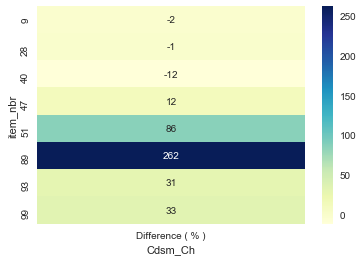

In [18]:
station_1 = pivot_diff.loc[1]
sns.heatmap(station_1, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_2
```
item_39 ... +262%
item_50 ... +192% 
item_85 ... +153%
item_93 ... +254%
```

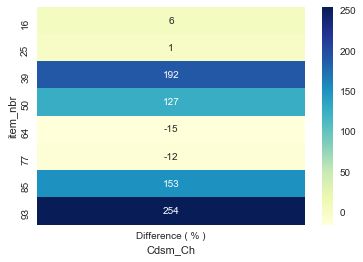

In [19]:
station_2 = pivot_diff.loc[2]
sns.heatmap(station_2, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_3
```
item_85 ... +100%
item_93 ... +109%
```

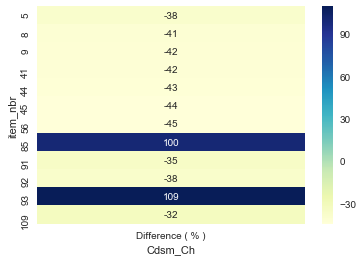

In [20]:
station_3 = pivot_diff.loc[3]
sns.heatmap(station_3, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_4
```
-
```

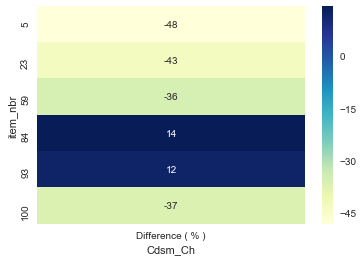

In [21]:
station_4 = pivot_diff.loc[4]
sns.heatmap(station_4, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_5
```
- Moderate Weather (No Abnormal Weather)
```

In [22]:
station_5 = pivot_diff.loc[5]
station_5
# sns.heatmap(station_5, cmap="YlGnBu", annot = True, fmt = '.0f')

Cdsm_Ch,Difference ( % )
item_nbr,
16,NaN
24,NaN
49,NaN
50,NaN
63,NaN
66,NaN
93,NaN
105,NaN


### Station_6
```
item_93 ... +139%
item_104 .. +311%
```

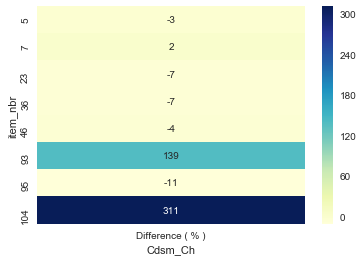

In [23]:
station_6 = pivot_diff.loc[6]
sns.heatmap(station_6, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_7
```
item_93 ... + 94%
item_102 .. +188%
```

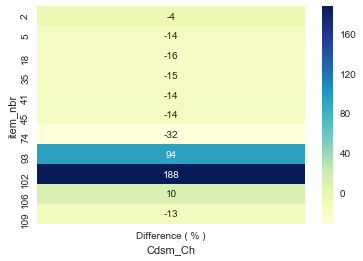

In [24]:
station_7 = pivot_diff.loc[7]
sns.heatmap(station_7, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_8
```
item_9 .... +104%
item_36 ... +115%
item_103 .. +117%
item_111 .. +134%
```

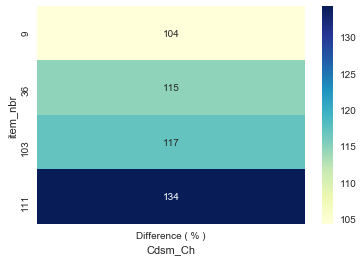

In [25]:
station_8 = pivot_diff.loc[8]
sns.heatmap(station_8, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_9
```
item_96 ... +327%
item_97 ... +830%
```

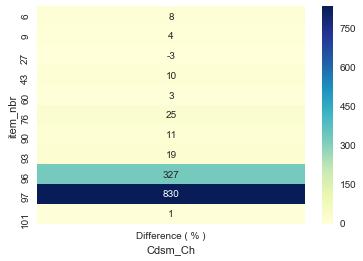

In [26]:
station_9 = pivot_diff.loc[9]
sns.heatmap(station_9, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_10
```
item_86 ... + 87%
item_93 ... + 70%
item_104 .. +253%
```

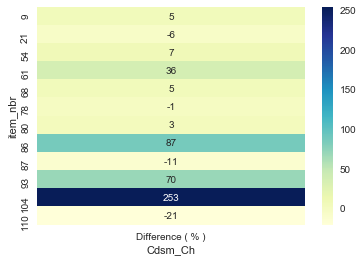

In [27]:
station_10 = pivot_diff.loc[10]
sns.heatmap(station_10, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_11
```
item_86 ... +121%
item_93 ... +132%
item_104 .. + 77%
```

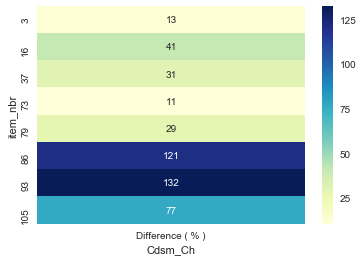

In [28]:
station_11 = pivot_diff.loc[11]
sns.heatmap(station_11, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_12
```
item_86 ... +417%
item_93 ... +150%
item_104 .. +207%
```

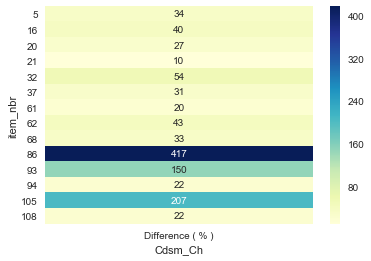

In [29]:
station_12 = pivot_diff.loc[12]
sns.heatmap(station_12, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_13
```
item_49 ... +113%
item_50 ... + 77%
item_81 ... - 59%
item_84 ... - 50%
item_104 .. + 60%
```

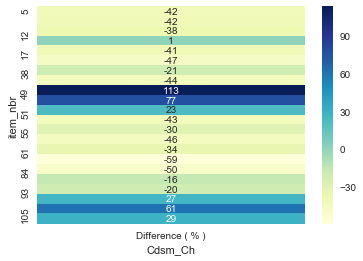

In [30]:
station_13 = pivot_diff.loc[13]
sns.heatmap(station_13, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_14
```
item_52 ... - 54%
item_86 ... +165%
item_93 ... + 68%
```

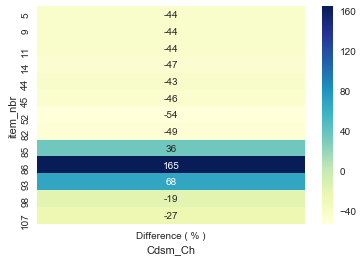

In [31]:
station_14 = pivot_diff.loc[14]
sns.heatmap(station_14, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_15
```
item_39 ... + 90%
item_88 ... +149%
item_93 ... +206%
```

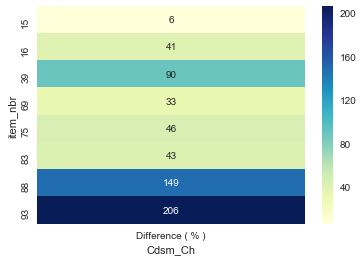

In [32]:
station_15 = pivot_diff.loc[15]
sns.heatmap(station_15, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_16
```
item_15 ... + 57%
item_34 ... + 75%
item_50 ... + 74%
item_88 ... + 64%
```

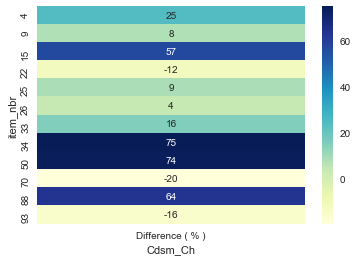

In [33]:
station_16 = pivot_diff.loc[16]
sns.heatmap(station_16, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_17
```
item_84 ... + 56%
item_104 .. +246%
```

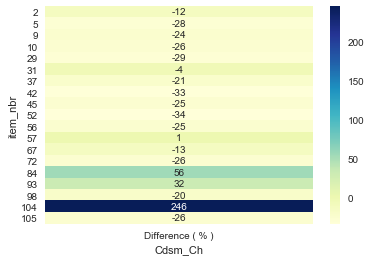

In [34]:
station_17 = pivot_diff.loc[17]
sns.heatmap(station_17, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_18
```
item_1 .... - 53%
item_44 ... - 52%
```

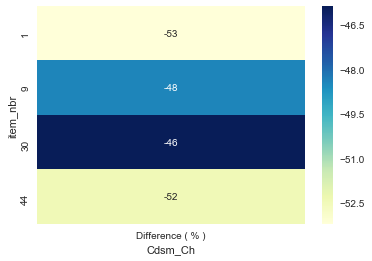

In [35]:
station_18 = pivot_diff.loc[18]
sns.heatmap(station_18, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_19
```
item_49 ... +273%
item_51 ... +462%
```

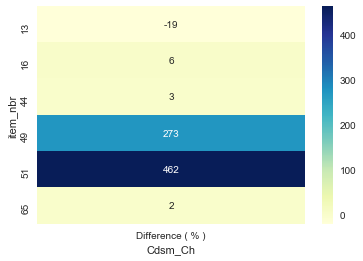

In [36]:
station_19 = pivot_diff.loc[19]
sns.heatmap(station_19, cmap="YlGnBu", annot = True, fmt = '.0f')

### Station_20
```
item_48 ... - 50%
```

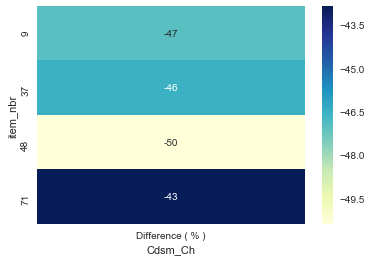

In [37]:
station_20 = pivot_diff.loc[20]
sns.heatmap(station_20, cmap="YlGnBu", annot = True, fmt = '.0f')